In [72]:
# #!pip install Franges
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy
# import scipy.stats as st
# #from numpy import random
# #from random import beta
# from franges import drange, frange

# import warnings
# warnings.filterwarnings('ignore')

# size = 30
# x = np.arange(size)
# #y = [random.beta(0.1,10.0) for _ in range(size)]
# y = st.beta.rvs(1, 10, size=size)
# #h = plt.hist(y, bins=range(size))
# h = plt.hist(y)

# dist_names = ['gamma', 'beta', 'triang', 'norm', 'erlang','lognorm', 'uniform']

# for dist_name in dist_names:
#     dist = getattr(scipy.stats, dist_name)
#     #print (dist)
#     params = dist.fit(y)
#     #print (params)
#     arg = params[:-2] #other attributes 
#     loc = params[-2] #position
#     scale = params[-1] #scale
#     if arg:
#         pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
#         #print (pdf_fitted)
#         print ('===========' + dist_name + '==================')
#         print ('Ktest result - ' + str(st.kstest(y, dist_name, args=params)))
#     else:
#         pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
#         print ('===========' + dist_name + '==================')
#         print ('Ktest result - ' + str(st.kstest(y, dist_name)))
#     plt.plot(pdf_fitted, label=dist_name)
#     plt.xlim(0,size)
    
    
# plt.legend(loc='upper right')
# plt.show()

    


### The below method uses the Chi square calculation to identify the best fit
1. Works for the contineous distribution as there is no fit method for the discrete methods
2. Creates bins for the data points and calculates the frequency of the points in the bin for the sample data.
3. Use the sample data to create the best distribution curve across different types of contineous distributions.
4. Use CDF to get the bins and frequemcy of points in each bin for each distribution type.
5. Calculate the chi-square value for actual and fitted distribution. Do this for all the distributions


In [73]:
# #https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802

# import matplotlib.pyplot as plt
# import numpy as np
# import scipy
# import scipy.stats as st
# import pandas as pd

# import warnings
# warnings.filterwarnings('ignore')

# dist_names = ['erlang','norm','beta', 
#               'invgauss','uniform','gamma','expon',   
#               'lognorm','pearson3','triang']
# size = 30000
# x = np.arange(size)
# y_std = scipy.int_(np.round_(scipy.stats.beta.rvs(6,2,size=size)*47))

# chi_square_statistics = []
# # 11 equi-distant bins of observed Data 
# percentile_bins = np.linspace(0,100,11)
# percentile_cutoffs = np.percentile(y_std, percentile_bins)
# observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
# cum_observed_frequency = np.cumsum(observed_frequency)

# print ('-----------Bins----------')
# print (percentile_bins)
# print ('-----------Cut offs----------')
# print (percentile_cutoffs)

# # Loop through candidate distributions
# for distribution in dist_names:
#     # Set up distribution and get fitted distribution parameters
#     dist = getattr(scipy.stats, distribution)
#     param = dist.fit(y_std)
#     print (distribution + ' ---- Paramaters for the curve')
#     print("{}\n{}\n".format(dist, param))


#     # Get expected counts in percentile bins
#     # cdf of fitted sistrinution across bins
#     cdf_fitted = dist.cdf(percentile_cutoffs, *param)
#     expected_frequency = []
#     for bin in range(len(percentile_bins)-1):
#         expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
#         expected_frequency.append(expected_cdf_area)

#     # Chi-square Statistics
#     expected_frequency = np.array(expected_frequency) * size
#     cum_expected_frequency = np.cumsum(expected_frequency)
#     ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
#     chi_square_statistics.append(ss)


# #Sort by minimum ch-square statistics
# results = pd.DataFrame()
# results['Distribution'] = dist_names
# results['chi_square'] = chi_square_statistics
# results.sort_values(['chi_square'], inplace=True)


# print ('\nDistributions listed by Betterment of fit:')
# print ('............................................')
# print (results)

### Uses Chi square and KS test to determins the best curve
 *https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/*
 1. Uses large amount of random data (Data from a breast cancer dataset)
 2. Apply standard scaling to the data. 
 3. Create Bins and identify the percentile. calculate the actual frequency of point in each bin. 
 4. For each distribution , create the best fit distribution for the data points.
 5. Apply ktest for each distribution 
 6. Use CDF to create the bins in the distribution and calculate the precentile and expected frequency.
 7. Calculate the chi-square values for each distribution
 8. Get the top 5-6 distribution and run fit disribution to  get the params.

In [74]:
#         dist_d = distfit(method='discrete')
#         dist_d.fit_transform(y)
#         param = dist_d.model['params']
#         print ('=============')
#         print (param)
#         print ('=============')

In [75]:
#generaate random numbers
import numpy as np
import scipy.stats as st
# from sklearn import datasets
# data_set = datasets.load_breast_cancer()
# y=data_set.data[:,0]

# random_float_array = np.random.uniform(0.1, 100, size=(10000))
# print(random_float_array)
# y = random_float_array
y = st.weibull_min.rvs(1, 100, size=50000)

dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max',
              'erlang']

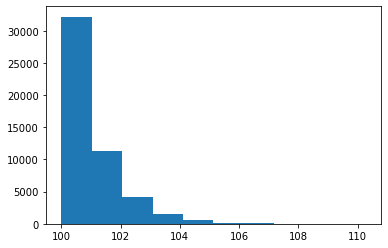


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution     chi_square  p_value  k-statistic  \
2         gamma       9.427205  0.80314      0.00287   
5      pearson3       9.808766  0.90015      0.00255   
8   weibull_min      16.053509  0.48243      0.00375   
10       erlang      17.573855  0.49799      0.00370   
1         expon      27.474955  0.21338      0.00473   
0          beta      28.185467  0.19006      0.00485   
3       lognorm    5410.085988  0.00000      0.03653   
9   weibull_max   81472.718038  0.00000      0.08175   
4          norm  240820.638186  0.00000      0.15946   
6        triang  596054.808481  0.00000      0.54464   
7       uniform  814519.167276  0.00000      0.67561   

                                               params  
2   (0.9917201791492718, -0.9966809547915295, 1.00...  
5   (2.0099663374354275, -2.100083669961051e-15, 1...  
8   (0.9931891938571088, -0.9966809547915295, 0.99...  
10  (0.9848713856692

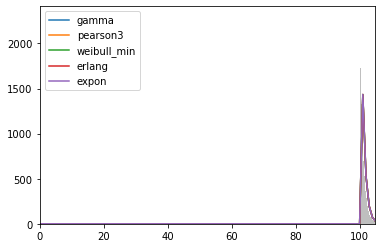


Distribution parameters:
------------------------

Distribution: gamma
Parameters: (0.9916246499026309, 100.00000774143582, 1.0100661394621662)

Distribution: pearson3
Parameters: (2.0022083646297277, 101.00145452842179, 1.002552566817419)

Distribution: weibull_min
Parameters: (0.9950590202477552, 100.00000774143582, 0.9988664761133192)

Distribution: erlang
Parameters: (0.9953090670076974, 100.00000774143582, 1.0109717739019133)

Distribution: expon
Parameters: (100.00000774143584, 1.0016188856018857)


In [76]:
#https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import binom
from distfit import distfit

%matplotlib inline
# Load data and select first column

# from sklearn import datasets
# data_set = datasets.load_breast_cancer()
# y=data_set.data[:,0]
#y = st.lognorm.rvs(1, 10, size=5000)
#y = np.array([9.7638,11.3562,9.7160,12.2246,34.3744,10.8660,4.8762,7.3981,20.4868,9.2278,19.2176,7.1702,4.5737,58.4858,15.4940,28.4212,40.6119,27.3730])
#print (y.type)
# Create an index array (x) for data

x = np.arange(len(y))
size = len(y)
#====================================
#plot the data 
plt.hist(y)
plt.show()
#describe the dataset
y_df = pd.DataFrame(y, columns=['Data'])
y_df.describe()

#standardize
sc=StandardScaler() 
yy = y.reshape (-1,1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
del yy

#==========================================================================
#chi-square test
# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# dist_names = ['beta',
#               'expon',
#               'gamma',
#               'lognorm',
#               'norm',
#               'pearson3',
#               'triang',
#               'uniform',
#               'weibull_min', 
#               'weibull_max',
#               'erlang']


# Set up empty lists to stroe results
chi_square = []
p_values = []
k_stats = []
params = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)

# print (np.linspace(0,100,51))
# print (np.percentile(y_std, percentile_bins))
# print (np.histogram(y_std, bins=percentile_cutoffs))
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters

    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    params.append(param)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    #p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    ktest = scipy.stats.kstest(y_std, distribution, args=param)
    p = np.around(ktest[1], 5)
    k_stat = np.around(ktest[0], 5)
    p_values.append(p)    
    k_stats.append(k_stat)
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results ['k-statistic'] = k_stats
results ['params'] = params
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)


#==========================================================================
#We will now take the top three fits, plot the fit and return the sklearn parameters. 
#This time we will fit to the raw data rather than the standardised data.
# Divide the observed data into 100 bins for plotting (this can be changed)
#==================================================================================
number_of_bins = 100
bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)

# Create the plot
h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# Get the top three distributions from the previous phase
number_distributions_to_plot = 5
dist_names_2 = results['Distribution'].iloc[0:number_distributions_to_plot]

# Create an empty list to stroe fitted distribution parameters
parameters = []

# Loop through the distributions ot get line fit and paraemters

for dist_name in dist_names_2:
    # Set up distribution and store distribution paraemters
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    parameters.append(param)
    
    # Get line for each distribution (and scale to match observed data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz (h[0], h[1][:-1]) / np.trapz (pdf_fitted, x)
    pdf_fitted *= scale_pdf
    
    # Add the line to the plot
    plt.plot(pdf_fitted, label=dist_name)
    
    # Set the plot x axis to contain 99% of the data
    # This can be removed, but sometimes outlier data makes the plot less clear
    plt.xlim(0,np.percentile(y,99))

# Add legend and display plot

plt.legend()
plt.show()

# Store distribution paraemters in a dataframe (this could also be saved)
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

# Print parameter results
print ('\nDistribution parameters:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nDistribution:', row[0])
    print ('Parameters:', row[1] )

### DistFit api uses the Probability density fitting uses residual sum of squares and hypothesis testing
Probability density fitting is the fitting of a probability distribution to a series of data concerning the repeated measurement of a variable phenomenon.

In [77]:
from sklearn import datasets
import pandas

# data_set = datasets.load_breast_cancer()

# y=data_set.data[:,0]

rss_score = []
loc = []
scale = []

from distfit import distfit
#get all popular dist in one go
#dist = distfit(todf=True)

for distribution in dist_names:
    dist = distfit(distr=distribution)
    dist.fit_transform(y)
    model_op = dist.model
    rss_score.append (model_op['score'])
    loc.append (model_op['loc'])
    scale.append (model_op['scale'])
#dist.plot()

##print in a dataframe
results_distfit = pd.DataFrame()
results_distfit['Distribution'] = dist_names
results_distfit['RSS'] = rss_score
results_distfit['loc'] = loc
results_distfit ['scale'] = scale

results_distfit.sort_values(['RSS'], inplace=True)
print (results_distfit)

# y = [-8,-6,0,1,2,3,4,5,6]
# dist.predict(y)
# dist.plot()

## binomial distribution
# dist_d = distfit(method='discrete')
# dist_d.fit_transform(y)
# print(dist.model)
# # dist.plot()

[distfit] >fit..
[distfit] >transform..
[distfit] >[beta] [1.73 sec] [RSS: 0.0008704] [loc=100.000 scale=61.263]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[expon] [0.00 sec] [RSS: 0.0010286] [loc=100.000 scale=1.002]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[gamma] [0.74 sec] [RSS: 0.0007740] [loc=100.000 scale=1.010]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[lognorm] [0.38 sec] [RSS: 0.0501376] [loc=99.929 scale=0.703]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 0.7514330] [loc=101.002 scale=1.005]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[pearson3] [5.59 sec] [RSS: 0.0009473] [loc=101.001 scale=1.003]
[distfit] >Compute confidence interval [parametric]
[distfi

In [78]:
print ('----------------Results based on chi-square and k-statistic using scipy stats ')
print (results)

print ('----------------Results based on  RSS using DistFit------------------')
print (results_distfit)

----------------Results based on chi-square and k-statistic using scipy stats 
   Distribution     chi_square  p_value  k-statistic  \
2         gamma       9.427205  0.80314      0.00287   
5      pearson3       9.808766  0.90015      0.00255   
8   weibull_min      16.053509  0.48243      0.00375   
10       erlang      17.573855  0.49799      0.00370   
1         expon      27.474955  0.21338      0.00473   
0          beta      28.185467  0.19006      0.00485   
3       lognorm    5410.085988  0.00000      0.03653   
9   weibull_max   81472.718038  0.00000      0.08175   
4          norm  240820.638186  0.00000      0.15946   
6        triang  596054.808481  0.00000      0.54464   
7       uniform  814519.167276  0.00000      0.67561   

                                               params  
2   (0.9917201791492718, -0.9966809547915295, 1.00...  
5   (2.0099663374354275, -2.100083669961051e-15, 1...  
8   (0.9931891938571088, -0.9966809547915295, 0.99...  
10  (0.9848713856692434,